In [146]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
import random

# Question 2

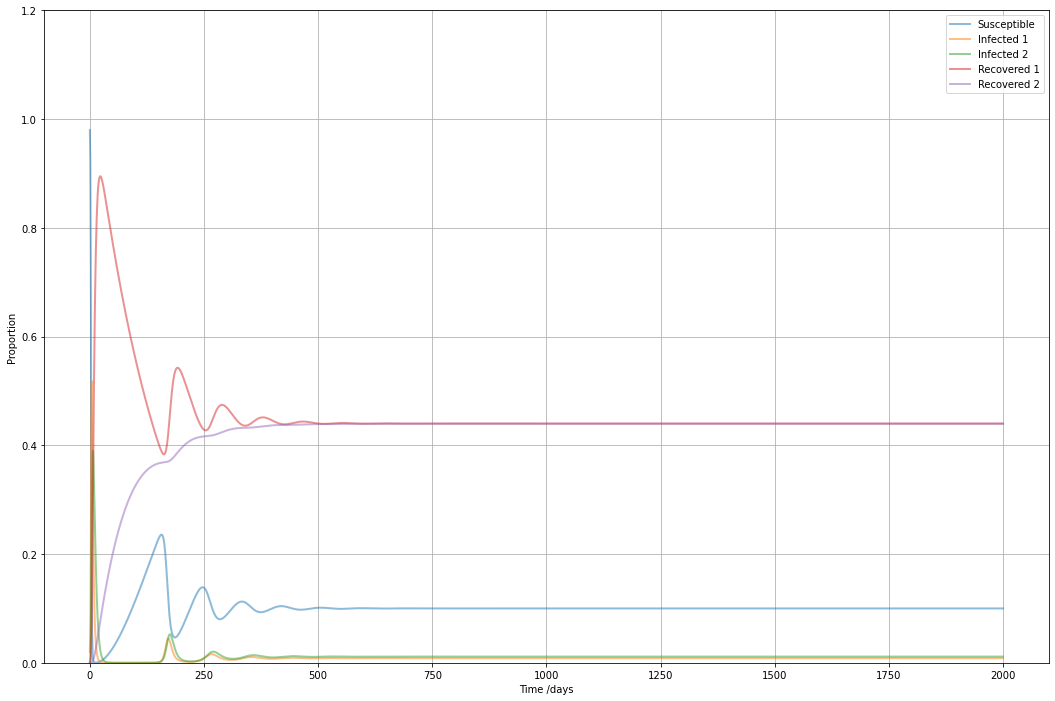

Percentage of population in an infected class at day 2000:  2.0000000858556035 %


In [141]:
N = 1000

# Initial number of infected and recovered individuals
I_1_0, I_2_0, R_1_0, R_2_0 = 20, 0,0,0

# Everyone else, S0, is susceptible to infection initially.
S0 = N - I_1_0 -I_2_0 -R_1_0- R_2_0

# Parameters
beta, gamma_1, gamma_2, eta_1, eta_2 = 10/7, 1./3,1./4,1./154,1./154

# A grid of time points (in days)
t = np.linspace(0, 2000, 2000)

# The multi-compartment SIRS model differential equations.
def deriv(y, t, N, beta, gamma_1, gamma_2, eta_1, eta_2):
    S, I_1,I_2, R_1,R_2 = y
    dSdt = -beta * S * (I_1+I_2) / N + eta_2*R_2
    dI_1dt = beta * S * (I_1+I_2) / N - gamma_1 * I_1
    dI_2dt = gamma_1*I_1 - gamma_2 * I_2
    dR_1dt = gamma_2 * I_2 - eta_1*R_1
    dR_2dt = eta_1*R_1 - eta_2*R_2
    return dSdt, dI_1dt, dI_2dt, dR_1dt, dR_2dt

# Initial conditions vector
y0 = S0, I_1_0, I_2_0, R_1_0, R_2_0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma_1, gamma_2, eta_1, eta_2))
S, I_1,I_2, R_1,R_2 = ret.T

fig, ax = plt.subplots(figsize=(18,12))
plt.plot(t, S/1000, alpha=0.5, lw=2, label='Susceptible')
plt.plot(t, I_1/1000, alpha=0.5, lw=2, label='Infected 1')
plt.plot(t, I_2/1000, alpha=0.5, lw=2, label='Infected 2')
plt.plot(t, R_1/1000,  alpha=0.5, lw=2, label='Recovered 1')
plt.plot(t, R_2/1000,  alpha=0.5, lw=2, label='Recovered 2')
plt.xlabel('Time /days')
plt.ylabel('Proportion')
plt.legend(loc="upper right")
plt.ylim((0,1.2))
plt.grid(True)
plt.show()

print("Percentage of population in an infected class at day 2000: ",((I_1[-1]+I_2[-1])/N)*100,"%")

# Question 3

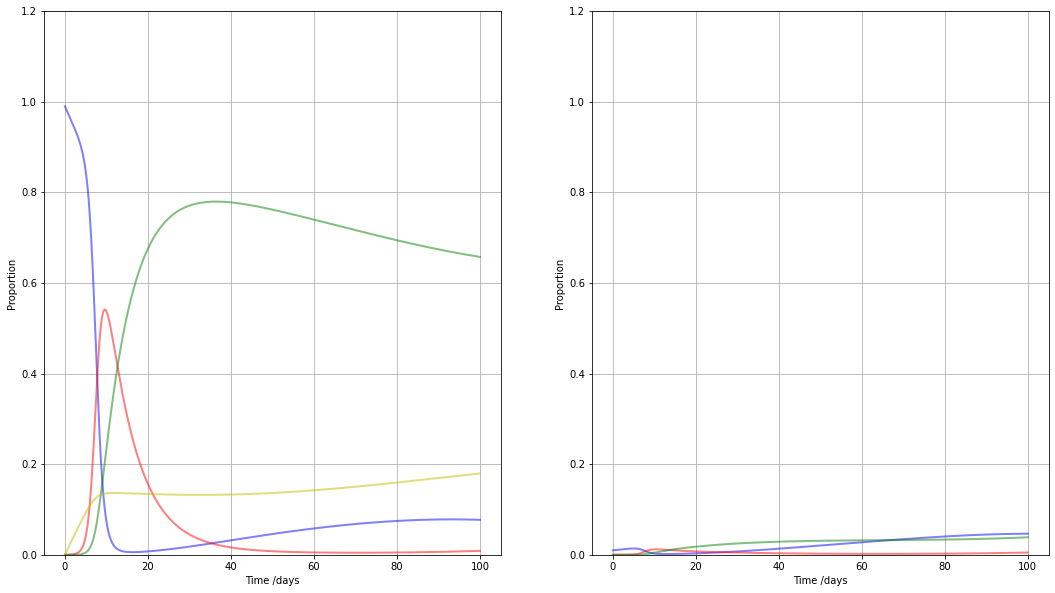

In [99]:
N = 10000
S_c_0, I_c_0, R_c_0, I_a_0, R_a_0, V_a_0 = 99,1,0,0,0,0
S_a_0 = N - S_c_0 - I_c_0 - R_c_0- I_a_0- R_a_0-V_a_0
B, d = 0.001*N, 0.001 # Birth and death rates
beta_cc, beta_ac, beta_ca, beta_aa = 10./(7*N),10./(7*N),10./(7*N),10./(7*N) # contact rate
tau_c, tau_a = 1./7,1./7 # recovery rate
L = 1./365 # age rate
eta_c, eta_a = 1./308,1./308 # resusceptibility
alpha = 1./50
gamma = 1./308 # vaccine wear off

# A grid of time points (in days)
t = np.linspace(0, 100, 1000)

# The SIR model differential equations.
def deriv(y, t, N, B,d,beta_cc,beta_ac,beta_ca,beta_aa,tau_c,tau_a,L,eta_c,eta_a,alpha,gamma):
    S_c,I_c,R_c,S_a,I_a,R_a,V_a = y
    dS_c = B - beta_cc*S_c*I_c - beta_ca*S_c*I_a - L*S_c - d*S_c + eta_c*R_c
    dI_c = beta_cc*S_c*I_c + beta_ca*S_c*I_a - L*I_c - tau_c*I_c - d*I_c
    dR_c = tau_c*I_c - L*R_c - d*R_c - eta_c*R_c
    dS_a = -beta_aa*S_a*I_a - beta_ac*S_a*I_c + L*S_c + eta_a*R_a + gamma*V_a - alpha*S_a - d*S_a
    dI_a = beta_aa*S_a*I_a + beta_ac*S_a*I_c + L*I_c - tau_a*I_a - d*I_a
    dR_a = tau_a*I_a + L*R_c - d*R_a - eta_a*R_a
    dV_a = alpha*S_a - gamma*V_a
    return dS_c,dI_c,dR_c,dS_a,dI_a,dR_a,dV_a

# Initial conditions vector
y0 = S_c_0, I_c_0, R_c_0, S_a_0, I_a_0, R_a_0, V_a_0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N,B,d,beta_cc,beta_ac,beta_ca,beta_aa,tau_c,tau_a,L,eta_c,eta_a,alpha,gamma))
S_c,I_c,R_c,S_a,I_a,R_a,V_a = ret.T

fig, ax = plt.subplots(figsize=(18,10))
plt.subplot(1,2,1)
plt.plot(t, S_a/N, 'b', alpha=0.5, lw=2, label='Susceptible adult')
plt.plot(t, I_a/N, 'r', alpha=0.5, lw=2, label='Infected adult')
plt.plot(t, R_a/N, 'g', alpha=0.5, lw=2, label='Recovered adult')
plt.plot(t, V_a/N, 'y', alpha=0.5, lw=2, label='Vaccinated adult')
plt.xlabel('Time /days')
plt.ylabel('Proportion')
plt.ylim((0,1.2))
# plt.xlim((0,50))
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(t, S_c/N, 'b', alpha=0.5, lw=2, label='Susceptible child')
plt.plot(t, I_c/N, 'r', alpha=0.5, lw=2, label='Infected child')
plt.plot(t, R_c/N, 'g', alpha=0.5, lw=2, label='Recovered child')
plt.xlabel('Time /days')
plt.ylabel('Proportion')
plt.ylim((0,1.2))
# plt.xlim((0,100))
plt.grid(True)
plt.show()

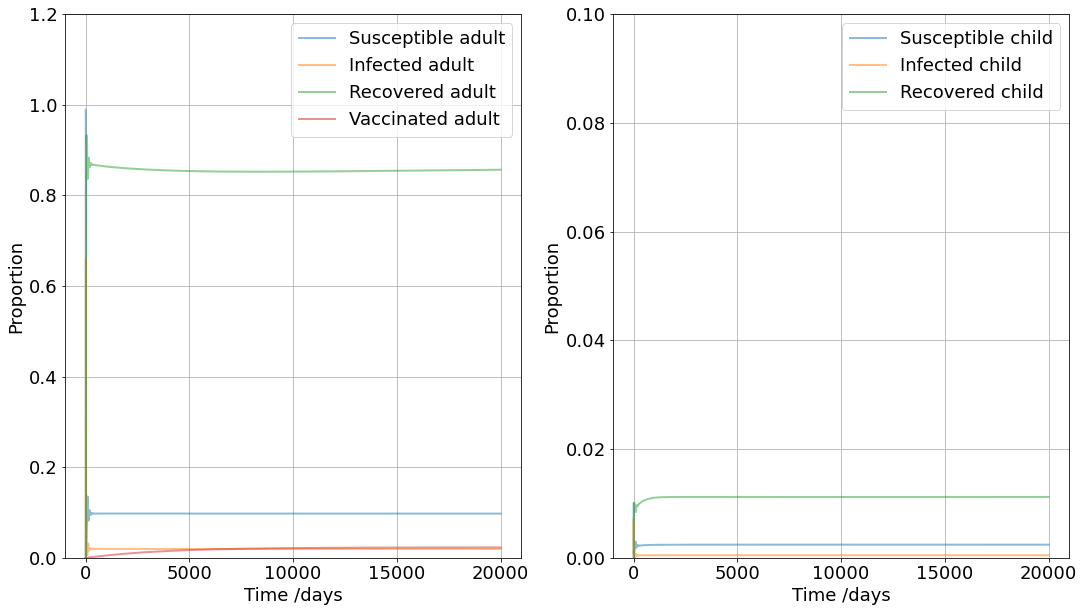

Percentage of infected > 1yr olds at day 20000:  1.9492684238429023 %
Percentage of infected < 1yr olds at day 20000:  0.047241052503228735 %


In [334]:
# Once aged either go into vaccinated or susceptible
N = 1000
S_c_0, I_c_0, R_c_0, I_a_0, R_a_0, V_a_0 = 10,1,0,0,0,0
S_a_0 = N - S_c_0 - I_c_0 - R_c_0- I_a_0- R_a_0-V_a_0
v_uptake = 0.95
B, d = (1/(365*70))*N, 1/(365*70) # Birth and death rates
beta_cc, beta_ac, beta_ca, beta_aa = 10./(7*N),10./(7*N),10./(7*N),10./(7*N) # contact rate
tau_c, tau_a = 1./7,1./7 # recovery rate
L = 1./365 # age rate
eta_c, eta_a = 1./308,1./308 # resusceptibility
alpha = 1./50
gamma = 1./(365*10) # vaccine wear off

# A grid of time points (in days)
t = np.linspace(0, 20000, 20000)

# The SIR model differential equations.
def deriv(y, t, N, B,d,beta_cc,beta_ac,beta_ca,beta_aa,tau_c,tau_a,L,eta_c,eta_a,alpha,gamma,v_uptake):
    S_c,I_c,R_c,S_a,I_a,R_a,V_a = y
    dS_c = B - beta_cc*S_c*I_c - beta_ca*S_c*I_a - L*S_c - d*S_c + eta_c*R_c
    dI_c = beta_cc*S_c*I_c + beta_ca*S_c*I_a - L*I_c - tau_c*I_c - d*I_c
    dR_c = tau_c*I_c - L*R_c - d*R_c - eta_c*R_c
    dS_a = -beta_aa*S_a*I_a - beta_ac*S_a*I_c + L*(1-v_uptake)*S_c + eta_a*R_a + gamma*V_a - d*S_a
    dI_a = beta_aa*S_a*I_a + beta_ac*S_a*I_c + L*I_c - tau_a*I_a - d*I_a
    dR_a = tau_a*I_a + L*R_c - d*R_a - eta_a*R_a
    dV_a = L*v_uptake*S_c - gamma*V_a
    return dS_c,dI_c,dR_c,dS_a,dI_a,dR_a,dV_a

# Initial conditions vector
y0 = S_c_0, I_c_0, R_c_0, S_a_0, I_a_0, R_a_0, V_a_0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N,B,d,beta_cc,beta_ac,beta_ca,beta_aa,tau_c,tau_a,L,eta_c,eta_a,alpha,gamma,v_uptake))
S_c,I_c,R_c,S_a,I_a,R_a,V_a = ret.T

fig, ax = plt.subplots(figsize=(18,10))
plt.subplot(1,2,1)
plt.plot(t, S_a/N,  alpha=0.5, lw=2, label='Susceptible adult')
plt.plot(t, I_a/N,  alpha=0.5, lw=2, label='Infected adult')
plt.plot(t, R_a/N,  alpha=0.5, lw=2, label='Recovered adult')
plt.plot(t, V_a/N,  alpha=0.5, lw=2, label='Vaccinated adult')
plt.xlabel('Time /days')
plt.ylabel('Proportion')
plt.ylim((0,1.2))
plt.legend(loc="upper right")
# plt.xlim((0,50))
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(t, S_c/N,  alpha=0.5, lw=2, label='Susceptible child')
plt.plot(t, I_c/N,  alpha=0.5, lw=2, label='Infected child')
plt.plot(t, R_c/N,  alpha=0.5, lw=2, label='Recovered child')
plt.xlabel('Time /days')
plt.ylabel('Proportion')
plt.legend(loc="upper right")
plt.ylim((0,0.1))
# plt.xlim((0,100))
plt.grid(True)
plt.show()

print("Percentage of infected > 1yr olds at day 20000: ",(I_a[-1]/N)*100,"%")
print("Percentage of infected < 1yr olds at day 20000: ",(I_c[-1]/N)*100,"%")

In [322]:
v_uptakes = [0.2,0.4,0.6,0.8,1]
v_duration = [2,4,6,8,10]

prop_child = np.zeros((5,5))
prop_adult = np.zeros((5,5))
prop_total = np.zeros((5,5))

for i,v_up in enumerate(v_uptakes):
    for j,v_dur in enumerate(v_duration):
        N = 1000
        S_c_0, I_c_0, R_c_0, I_a_0, R_a_0, V_a_0 = 10,1,0,0,0,0
        S_a_0 = N - S_c_0 - I_c_0 - R_c_0- I_a_0- R_a_0-V_a_0
        B, d = (1/(365*70))*N, 1/(365*70) # Birth and death rates
        beta_cc, beta_ac, beta_ca, beta_aa = 10./(7*N),10./(7*N),10./(7*N),10./(7*N) # contact rate
        tau_c, tau_a = 1./7,1./7 # recovery rate
        L = 1./365 # age rate
        eta_c, eta_a = 1./308,1./308 # resusceptibility
        alpha = 1./50
        gamma = 1./(365*v_dur)
        # A grid of time points (in days)
        t = np.linspace(0, 20000, 20000)

        y0 = S_c_0, I_c_0, R_c_0, S_a_0, I_a_0, R_a_0, V_a_0
        # Integrate the SIR equations over the time grid, t.
        ret = odeint(deriv, y0, t, args=(N,B,d,beta_cc,beta_ac,beta_ca,beta_aa,tau_c,tau_a,L,eta_c,eta_a,alpha,gamma,v_up))
        S_c,I_c,R_c,S_a,I_a,R_a,V_a = ret.T

        prop_adult[i][j] = (I_a[-1]/N)*100
        prop_child[i][j] = (I_c[-1]/N)*100
        prop_total[i][j] = ((I_c[-1]+I_a[-1])/N)*100

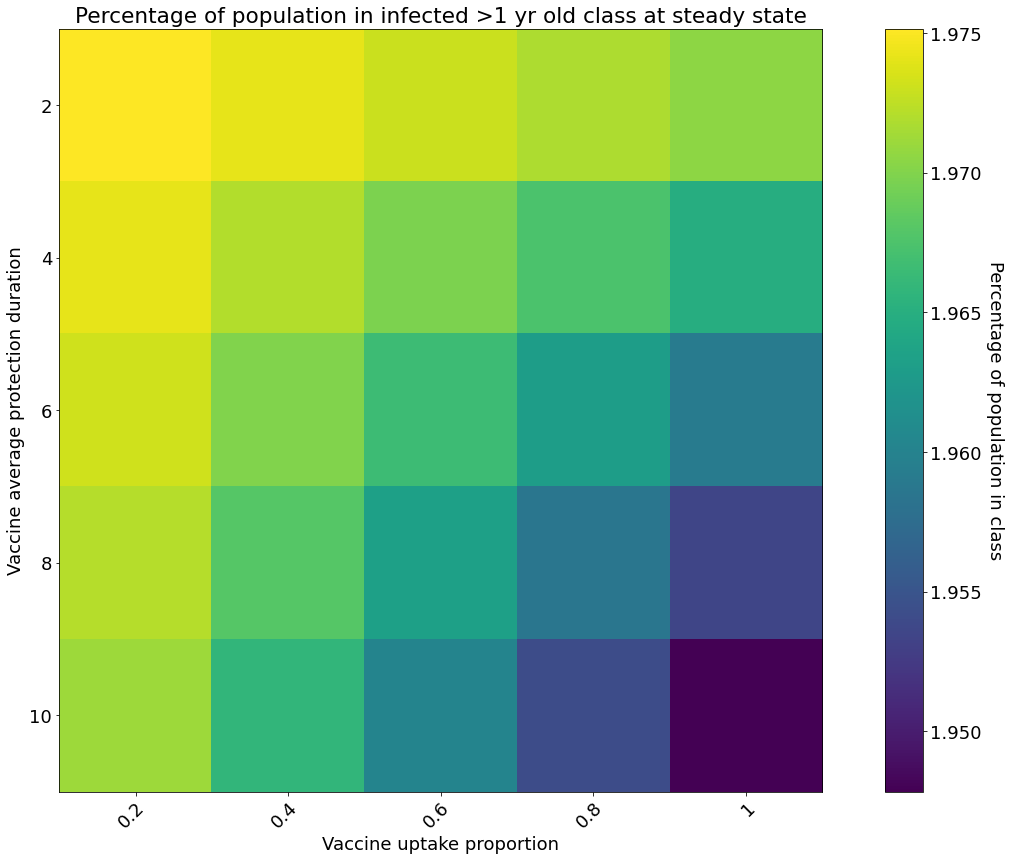

In [333]:
# Plot heatmaps
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize=(18,12))
im = ax.imshow(prop_adult)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(v_uptakes)), labels=v_uptakes)
ax.set_yticks(np.arange(len(v_duration)), labels=v_duration)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Percentage of population in class", rotation=-90, va="bottom")

ax.set_title("Percentage of population in infected >1 yr old class at steady state")
fig.tight_layout()

plt.xlabel("Vaccine uptake proportion")
plt.ylabel("Vaccine average protection duration")
plt.show()

# Question 4

A Sellke Construction Household model

In [252]:
# Global parameters
gl_death_r = -(1/(365*70))
gl_age_r = -(1./365)

params = {
    "beta": 10./7,
    "tau": 1./7,
    "eta": 1./308,
    "gamma": 1./(308*10)
}

class Person:
    def __init__(self, age_f,dis_f,death_f, ty="s_c"):
        self.ty = ty
        self.age_f = age_f
        self.age_r = 0
        self.dis_f = dis_f
        self.dis_r = 0
        self.death_f = death_f
        self.death_r = gl_death_r
        
    def update_rates(self,external_I,external_N,internal_I,internal_N): 
        # Only children age
        if self.ty in ["s_c","i_c","r_c"]:
            self.age_r = gl_age_r
        else:
            self.age_r = 0 
            
        if self.ty[0] == "s":
            outside_r = (-1*external_I*params["beta"])/external_N
            inside_r = (-1*internal_I*params["beta"])/internal_N
            self.dis_r = (0.2*outside_r) + (0.8*inside_r)
        elif self.ty[0] == "i":
            self.dis_r = -1*params["tau"]
        elif self.ty[0] == "r":
            self.dis_r = -1*params["eta"]
        else:
            self.dis_r = -1*params["gamma"]
        
    def update_f(self, time_step):
        if self.ty == "d":
            return
        
        # Calculate new forcefields
        self.age_f += self.age_r*time_step
        self.dis_f += self.dis_r*time_step
        self.death_f += self.death_r*time_step
        
        # Check for changes in type
        if self.age_f <= 0:
            self.ty = self.ty[0]+"_a"
            self.age_f = 100
        elif self.dis_f <= 0:
            if self.ty[0] == "s":
                self.ty = "i"+self.ty[1:3]
            elif self.ty[0] == "i":
                self.ty = "r"+self.ty[1:3]
            else:
                # If vaccinated or recovered go back to susceptible
                self.ty = "s"+self.ty[1:3]
            self.dis_f = -math.log(random.random())
        
        if self.death_f <= 0:
            self.ty = "d"
            self.death_f = 100

class House:
    def __init__(self,types,birth_f,vax,vax_uptake):
        # Generate initial household
        self.people = [Person(-math.log(random.random()),-math.log(random.random()),-math.log(random.random()),t) 
                       for t in types]
        self.birth_f = birth_f
        self.birth_r = 0
        self.vax = vax
        self.vax_uptake = vax_uptake
        
    def update_rates(self):
        self.birth_r = len([p for p in self.people if p.ty != "d"])*gl_death_r # Don't count dead people in household
        
    def update_f(self, time_step):
        self.birth_f += self.birth_r*time_step
        
        # Add new member to house
        if self.birth_f <= 0:
            self.people.append(Person(-math.log(random.random()),-math.log(random.random()),-math.log(random.random()),"s_c"))
        
            # Reset forcefield
            self.birth_f = -math.log(random.random())
            
            # Vaccinate
            if self.vax:
                self.vaccinate()
            
    def vaccinate(self):
        for p in self.people:
            if p.ty in ["s_a","r_a"] and random.random()<=self.vax_uptake:
                p.ty = "v_a"
            
        
class HouseholdModel:
    def __init__(self,house_types,delta_t,max_t,vax=False,vax_uptake=0.95):
        # Capture numbers over time
        self.time = [0]
        self.s_c = []
        self.i_c = []
        self.r_c = []
        self.s_a = []
        self.i_a = []
        self.r_a = []
        self.v_a = []
        self.N = []

        self.delta_t = delta_t
        self.max_t = max_t
        self.vax_uptake = vax_uptake
        self.params = params
        
        # Generate initial households
        self.household = [House(t,-math.log(random.random()),vax,vax_uptake) for t in house_types]
        
        # Give vaccinations
        if vax:
            for h in self.household:
                for p in h.people:
                    if p.ty in ["s_c","i_c","r_c"]:
                        h.vaccinate()
                        break  
        
        self.count()
        self.run()
        
    def count(self):
        curr_types = [0,0,0,0,0,0,0]
        for h in self.household:
            for p in h.people:
                if p.ty == "s_c":
                    curr_types[0] += 1
                elif p.ty == "i_c":
                    curr_types[1] += 1
                elif p.ty == "r_c":
                    curr_types[2] += 1
                elif p.ty == "s_a":
                    curr_types[3] += 1
                elif p.ty == "i_a":
                    curr_types[4] += 1
                elif p.ty == "r_a":
                    curr_types[5] += 1
                elif p.ty == "v_a":
                    curr_types[6] += 1
    
        self.s_c.append(curr_types[0])
        self.i_c.append(curr_types[1])
        self.r_c.append(curr_types[2])
        self.s_a.append(curr_types[3])
        self.i_a.append(curr_types[4])
        self.r_a.append(curr_types[5])
        self.v_a.append(curr_types[6])
        self.N.append(self.s_c[-1]+self.i_c[-1]+self.r_c[-1]+self.s_a[-1]+self.i_a[-1]+self.r_a[-1]+self.v_a[-1]) 
        
    def step(self):    
        ext_I = self.i_c[-1]+self.i_a[-1]
        ext_N = self.N[-1]
        
        # Reinfect if infection has died out
        if ext_I <= 0:
            i = random.randint(0,len(self.household)-1)
            j = random.randint(0,len(self.household[i].people)-1)
            self.household[i].people[j].ty = "i"+self.household[i].people[j].ty[1:3]
            self.household[i].people[j].age_f = -math.log(random.random())
            self.household[i].people[j].dis_f = -math.log(random.random())
            self.household[i].people[j].death_f = -math.log(random.random())
            
        # Update rates for everyone first
        for h in self.household:
            internal_I = len([p for p in h.people if p.ty in ["i_c","i_a"]])
            internal_N = len([p for p in h.people if p.ty not in ["d"]])
            h.update_rates() 
            for p in h.people:
                p.update_rates(ext_I,ext_N,internal_I,internal_N)
                
        for h in self.household:
            for p in h.people:
                p.update_f(self.delta_t)
            h.update_f(self.delta_t)  # Dont want to update new person joining household on this time step
            
        self.time.append(self.time[-1]+self.delta_t)
        self.count()
        
    def run(self):
        while self.time[-1] <= self.max_t:
            self.step()

In [264]:
h_types = []
for i in range(1000):
    t = ["s_c","s_a","s_a"]
    h_types.append(t)
    
for i in range(10000):
    t = ["s_a","s_a","s_a","s_a"]
    h_types.append(t)
    
for i in range(2):
    t = ["i_a","s_a","s_a","s_a"]
    h_types.append(t)

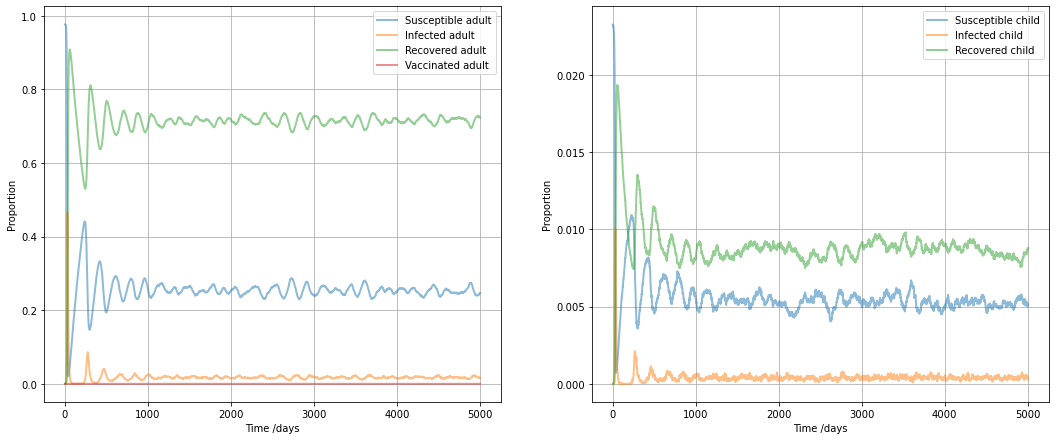

In [270]:
model = HouseholdModel(h_types,1,5000,False)
fig, ax = plt.subplots(figsize=(18,16))
plt.subplot(2,2,1)
plt.plot(model.time, [model.s_a[i]/model.N[i] for i in range(len(model.s_a))],  alpha=0.5, lw=2, label='Susceptible adult')
plt.plot(model.time, [model.i_a[i]/model.N[i] for i in range(len(model.i_a))],  alpha=0.5, lw=2, label='Infected adult')
plt.plot(model.time, [model.r_a[i]/model.N[i] for i in range(len(model.s_a))],  alpha=0.5, lw=2, label='Recovered adult')
plt.plot(model.time, [model.v_a[i]/model.N[i] for i in range(len(model.s_a))],  alpha=0.5, lw=2, label='Vaccinated adult')
plt.xlabel('Time /days')
plt.ylabel('Proportion')
plt.legend(loc="upper right")
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(model.time, [model.s_c[i]/model.N[i] for i in range(len(model.s_a))],  alpha=0.5, lw=2, label='Susceptible child')
plt.plot(model.time, [model.i_c[i]/model.N[i] for i in range(len(model.s_a))],  alpha=0.5, lw=2, label='Infected child')
plt.plot(model.time, [model.r_c[i]/model.N[i] for i in range(len(model.s_a))],  alpha=0.5, lw=2, label='Recovered child')
plt.xlabel('Time /days')
plt.ylabel('Proportion')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

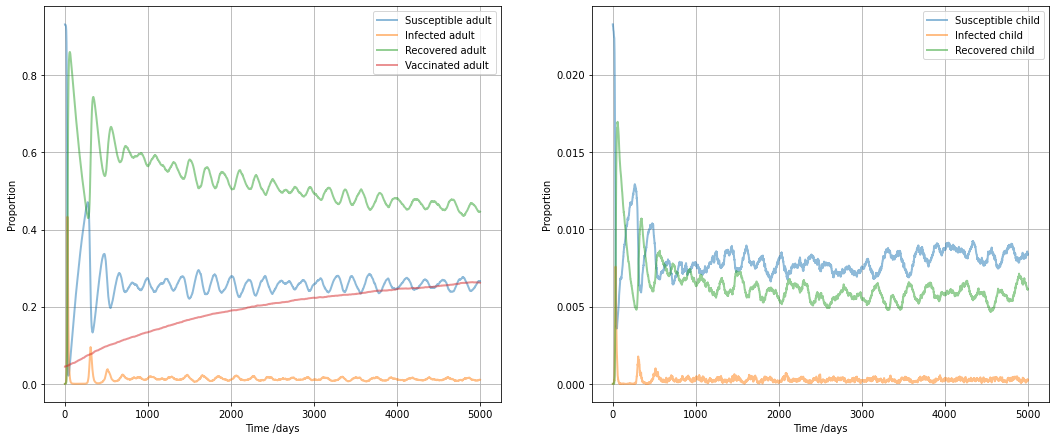

In [271]:
model_v = HouseholdModel(h_types,1,5000,True)
fig, ax = plt.subplots(figsize=(18,16))
plt.subplot(2,2,1)
plt.plot(model_v.time, [model_v.s_a[i]/model_v.N[i] for i in range(len(model_v.s_a))],  alpha=0.5, lw=2, label='Susceptible adult')
plt.plot(model_v.time, [model_v.i_a[i]/model_v.N[i] for i in range(len(model_v.i_a))],  alpha=0.5, lw=2, label='Infected adult')
plt.plot(model_v.time, [model_v.r_a[i]/model_v.N[i] for i in range(len(model_v.s_a))],  alpha=0.5, lw=2, label='Recovered adult')
plt.plot(model_v.time, [model_v.v_a[i]/model_v.N[i] for i in range(len(model_v.s_a))],  alpha=0.5, lw=2, label='Vaccinated adult')
plt.xlabel('Time /days')
plt.ylabel('Proportion')
plt.legend(loc="upper right")
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(model_v.time, [model_v.s_c[i]/model_v.N[i] for i in range(len(model_v.s_a))],  alpha=0.5, lw=2, label='Susceptible child')
plt.plot(model_v.time, [model_v.i_c[i]/model_v.N[i] for i in range(len(model_v.s_a))],  alpha=0.5, lw=2, label='Infected child')
plt.plot(model_v.time, [model_v.r_c[i]/model_v.N[i] for i in range(len(model_v.s_a))],  alpha=0.5, lw=2, label='Recovered child')
plt.xlabel('Time /days')
plt.ylabel('Proportion')
plt.legend(loc="upper right")
plt.grid(True)
plt.show()

In [273]:
print("UNVACCINATED MODEL")
print("Percentage of infected children at day 5000: ",(model.i_c[-1]/model.N[-1])*100,"%")
print("Percentage of population in an infected class at day 5000: ",((model.i_c[-1]+model.i_a[-1])/model.N[-1])*100,"%")
print()
print("VACCINATED MODEL (95% Uptake)")
print("Percentage of infected children at day 5000: ",(model_v.i_c[-1]/model_v.N[-1])*100,"%")
print("Percentage of population in an infected class at day 5000: ",((model_v.i_c[-1]+model_v.i_a[-1])/model_v.N[-1])*100,"%")

UNVACCINATED MODEL
Percentage of infected children at day 5000:  0.02782415136338342 %
Percentage of population in an infected class at day 5000:  1.6462622890001857 %

VACCINATED MODEL (95% Uptake)
Percentage of infected children at day 5000:  0.02097951001188839 %
Percentage of population in an infected class at day 5000:  1.074617123942283 %
